In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

import geopandas as gpd
import contextily as ctx

from PIL import Image
from io import BytesIO

In [2]:
with open('data/api_keys.json', 'r') as file:
    keys = json.load(file)

maps_api_key = keys['Google']
geonames_username = keys['Geonames']

Persons - https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Person/f55k-p6yu/about_data  
Crashes - https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data

# Persons

In [3]:
persons = pd.read_csv('data/raw/Motor_Vehicle_Collisions_-_Person_20240910.csv')
print(f'DF Shape: {persons.shape}')
display(persons.head())
display(persons.tail())

DF Shape: (5465905, 21)


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
5465900,13075922,4748879,08/15/2024,18:14,8fb8bae3-d103-4057-91d7-e1deb6df063a,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Witness,NaN,NaN,NaN
5465901,13073491,4749474,08/20/2024,23:50,18e70cac-a19d-4532-b64a-8fc448b8407f,Occupant,Unspecified,20704654.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Owner,NaN,NaN,NaN
5465902,13075758,4749928,08/20/2024,22:40,6f164e90-0d42-40be-9244-8a7575210bf0,Occupant,Unspecified,20705976.0,49.0,Not Ejected,...,Does Not Apply,Driver,Lap Belt & Harness,NaN,NaN,Does Not Apply,Driver,NaN,NaN,M
5465903,13075379,4749938,08/20/2024,18:54,68e9b4fa-a0ca-4e33-94b1-f0393279d457,Occupant,Unspecified,20705749.0,30.0,Not Ejected,...,Does Not Apply,Driver,NaN,NaN,NaN,Does Not Apply,Driver,NaN,NaN,M
5465904,13075212,4749660,08/20/2024,21:45,558d9481-23dd-4988-9f78-aec44a8d77b1,Occupant,Unspecified,20705644.0,69.0,Not Ejected,...,Does Not Apply,Driver,Lap Belt & Harness,NaN,NaN,Does Not Apply,Driver,NaN,NaN,M


In [4]:
persons.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT',
       'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
       'PERSON_SEX'],
      dtype='object')

In [5]:
persons['CRASH_DATE'] = pd.to_datetime(persons['CRASH_DATE'])
persons['CRASH_TIME'] = pd.to_datetime(persons['CRASH_TIME']).dt.time

display(persons[['CRASH_DATE', 'CRASH_TIME']].head())

C:\Users\Keith\AppData\Local\Temp\ipykernel_42092\2670052160.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  persons['CRASH_TIME'] = pd.to_datetime(persons['CRASH_TIME']).dt.time


,CRASH_DATE,CRASH_TIME
0,2019-10-26,09:43:00
1,2019-10-25,15:15:00
2,2019-10-26,17:55:00
3,2016-11-21,13:05:00
4,2019-10-25,11:16:00


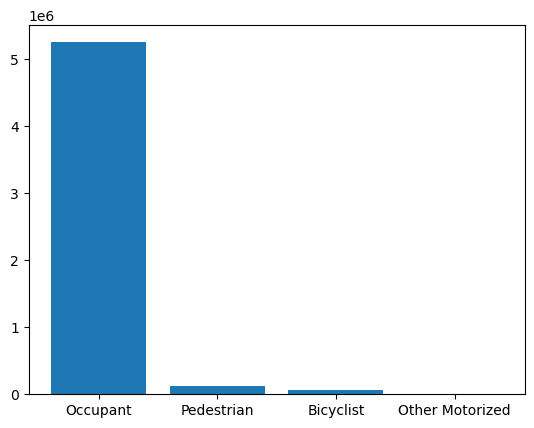

In [6]:
plt.figure()
plt.bar(persons['PERSON_TYPE'].value_counts().index, persons['PERSON_TYPE'].value_counts().values)
plt.show()

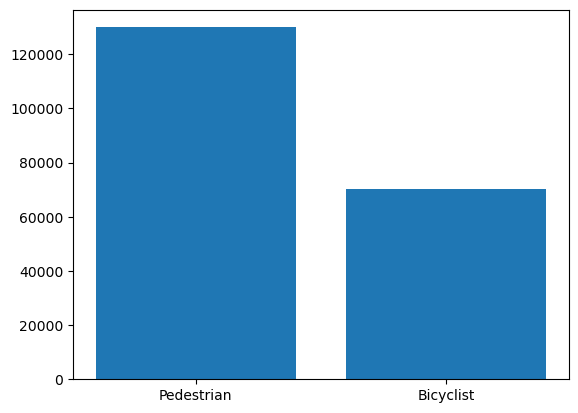

In [7]:
persons_only = persons[(persons['PERSON_TYPE'] != 'Occupant') & (persons['PERSON_TYPE'] != 'Other Motorized')]

plt.figure()
plt.bar(persons_only['PERSON_TYPE'].value_counts().index, persons_only['PERSON_TYPE'].value_counts().values)
plt.show()

C:\Users\Keith\AppData\Local\Temp\ipykernel_42092\552492355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  persons_only['YEAR'] = pd.DatetimeIndex(persons_only['CRASH_DATE']).year


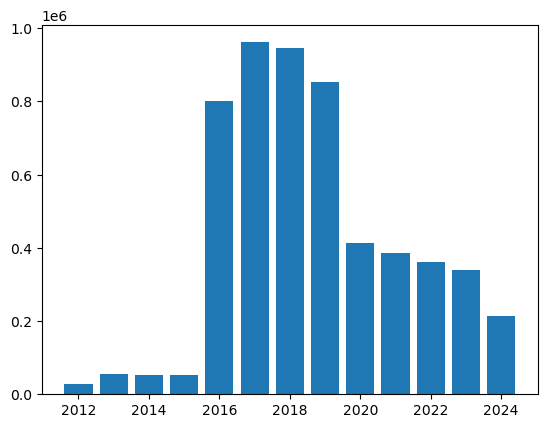

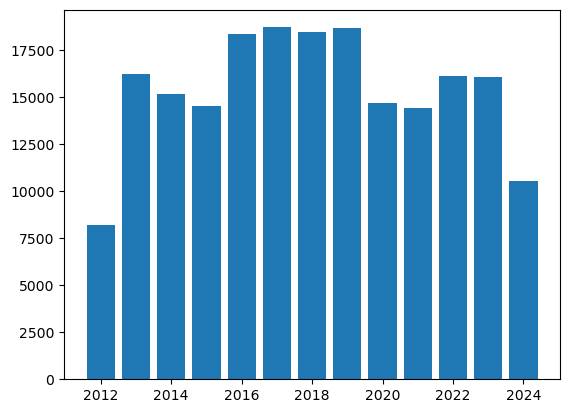

In [8]:
persons['YEAR'] = pd.DatetimeIndex(persons['CRASH_DATE']).year
persons_only['YEAR'] = pd.DatetimeIndex(persons_only['CRASH_DATE']).year

plt.figure()
plt.bar(persons['YEAR'].value_counts().index, persons['YEAR'].value_counts().values)
plt.show()

plt.figure()
plt.bar(persons_only['YEAR'].value_counts().index, persons_only['YEAR'].value_counts().values)
plt.show()

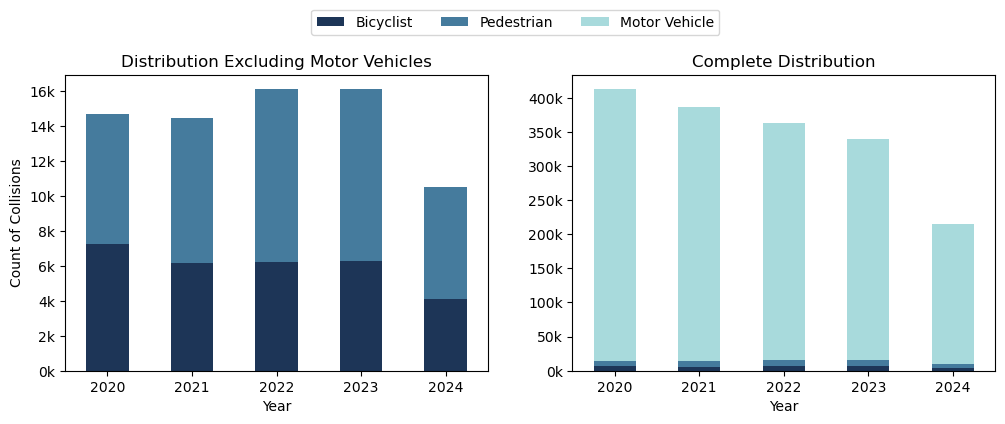

In [11]:
# Simplify PERSON_TYPE
persons.loc[persons.PERSON_TYPE == 'Other Motorized', 'PERSON_TYPE'] = 'Occupant'

# Group the data by year and person type, counting occurrences
grouped_data = persons.groupby(['YEAR', 'PERSON_TYPE']).size().unstack(fill_value=0)
grouped_data = grouped_data[grouped_data.index >= 2020]
grouped_data.columns = ['Bicyclist', 'Motor Vehicle', 'Pedestrian']
grouped_data = grouped_data[['Bicyclist', 'Pedestrian', 'Motor Vehicle']]

# Plotting
colors1 = ['#1d3557', '#457b9d', '#a8dadc'] #, '#CCCCCC', '#B3B3B3', '#999999', '#808080', '#666666']
colors0 = colors1[:len(grouped_data.drop(['Motor Vehicle'], axis=1).columns)]
fig, axes = plt.subplots(1, 2, figsize=(12,4))
fig.subplots_adjust(top=0.85)

# Create the stacked bar chart
grouped_data.drop(['Motor Vehicle'], axis=1).plot(kind='bar', stacked=True, legend=False, color=colors0, ax=axes[0])
grouped_data.plot(kind='bar', stacked=True, color=colors1, ax=axes[1])

# Customize the appearance
axes[0].set_title('Distribution Excluding Motor Vehicles')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count of Collisions')
axes[0].tick_params(axis='x', rotation=0)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}k'))

axes[1].set_title('Complete Distribution')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=0)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}k'))

# Adjust legend placement
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=len(labels))
axes[1].get_legend().remove()

plt.show()

In [10]:
grouped_data.sum(axis=0)

Bicyclist          29986
Pedestrian         41851
Motor Vehicle    1644119
dtype: int64

# Crashes

In [11]:
crashes = pd.read_csv('data/raw/Motor_Vehicle_Collisions_-_Crashes_20240911.csv', low_memory=False)
print(f'DF Shape: {crashes.shape}')
display(crashes.head())
display(crashes.tail())

DF Shape: (2117343, 29)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
2117338,08/20/2024,15:18,BROOKLYN,11212,NaN,NaN,NaN,NaN,NaN,44 NEW LOTS AVENUE,...,Unspecified,NaN,NaN,NaN,4750415,Sedan,Box Truck,NaN,NaN,NaN
2117339,08/21/2024,8:50,BRONX,10475,NaN,NaN,NaN,NaN,NaN,2035 BARTOW AVENUE,...,Unspecified,NaN,NaN,NaN,4750338,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2117340,08/21/2024,20:10,QUEENS,11103,NaN,NaN,NaN,BROADWAY,NEWTOWN ROAD,NaN,...,Unspecified,NaN,NaN,NaN,4750194,Station Wagon/Sport Utility Vehicle,Moped,NaN,NaN,NaN
2117341,08/21/2024,12:58,BRONX,10462,NaN,NaN,NaN,WHITE PLAINS ROAD,WOOD AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4750059,Bike,Sedan,NaN,NaN,NaN
2117342,08/21/2024,6:23,QUEENS,11102,NaN,NaN,NaN,30 AVENUE,31 STREET,NaN,...,NaN,NaN,NaN,NaN,4749876,Sedan,NaN,NaN,NaN,NaN


In [12]:
crashes.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

# Join

In [13]:
persons = pd.merge(left=persons, right=crashes, left_on='COLLISION_ID', right_on='COLLISION_ID', how='inner')
persons.shape
persons.head

<bound method NDFrame.head of          UNIQUE_ID  COLLISION_ID CRASH_DATE CRASH_TIME  \
0         10249006       4229554 2019-10-26   09:43:00   
1         10255054       4230587 2019-10-25   15:15:00   
2         10253177       4230550 2019-10-26   17:55:00   
3          6650180       3565527 2016-11-21   13:05:00   
4         10255516       4231168 2019-10-25   11:16:00   
...            ...           ...        ...        ...   
5465900   13075922       4748879 2024-08-15   18:14:00   
5465901   13073491       4749474 2024-08-20   23:50:00   
5465902   13075758       4749928 2024-08-20   22:40:00   
5465903   13075379       4749938 2024-08-20   18:54:00   
5465904   13075212       4749660 2024-08-20   21:45:00   

                                    PERSON_ID PERSON_TYPE PERSON_INJURY  \
0        31aa2bc0-f545-444f-8cdb-f1cb5cf00b89    Occupant   Unspecified   
1        4629e500-a73e-48dc-b8fb-53124d124b80    Occupant   Unspecified   
2        ae48c136-1383-45db-83f4-2a5eecfb7cff   

In [14]:
persons_only = pd.merge(left=persons_only, right=crashes, left_on='COLLISION_ID', right_on='COLLISION_ID', how='inner')
persons_only.shape

(200220, 50)

In [15]:
persons_only.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT',
       'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
       'PERSON_SEX', 'YEAR', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME',
       'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
    

In [16]:
print(
    f'Original DF Shape: {persons.shape}\n'
    f'Shape w/out NaN for LOCATION: {persons.dropna(subset="LOCATION").shape}\n'
    f'Shape w/out zero for LONGITUDE: {persons[persons["LONGITUDE"] != 0].shape}\n'
    f'Shape w/out NaN or zero for LOCATION: {persons[(persons["LONGITUDE"] != 0) & (persons["LOCATION"].notna())].shape}'
)

Original DF Shape: (5465905, 50)
Shape w/out NaN for LOCATION: (4914994, 50)
Shape w/out zero for LONGITUDE: (5449435, 50)
Shape w/out NaN or zero for LOCATION: (4898524, 50)


In [17]:
persons = persons.dropna(subset='LOCATION').reset_index(drop=True)
persons = persons[persons['LONGITUDE'] != 0].reset_index(drop=True)

persons_only = persons_only.dropna(subset='LOCATION').reset_index(drop=True)
persons_only = persons_only[persons_only['LONGITUDE'] != 0].reset_index(drop=True)

print(
    f'Updated DF Shape for persons: {persons.shape}'
    f'\nUpdated DF Shape for persons_only: {persons_only.shape}'
)

Updated DF Shape for persons: (4898524, 50)
Updated DF Shape for persons_only: (183762, 50)


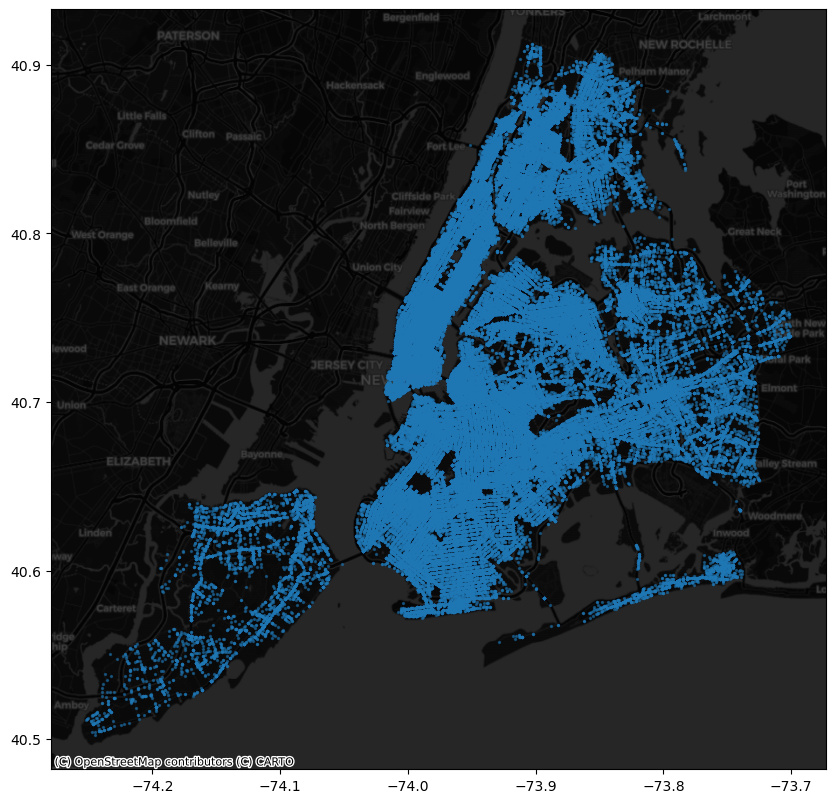

In [18]:
gdf = gpd.GeoDataFrame(
    persons_only, crs="EPSG:4326",
    geometry=gpd.points_from_xy(persons_only.LONGITUDE, persons_only.LATITUDE)
)

# Plot the points on a map
ax = gdf.plot(figsize=(10, 10), alpha=0.5, markersize=2)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter, crs=gdf.crs.to_string())

plt.show()

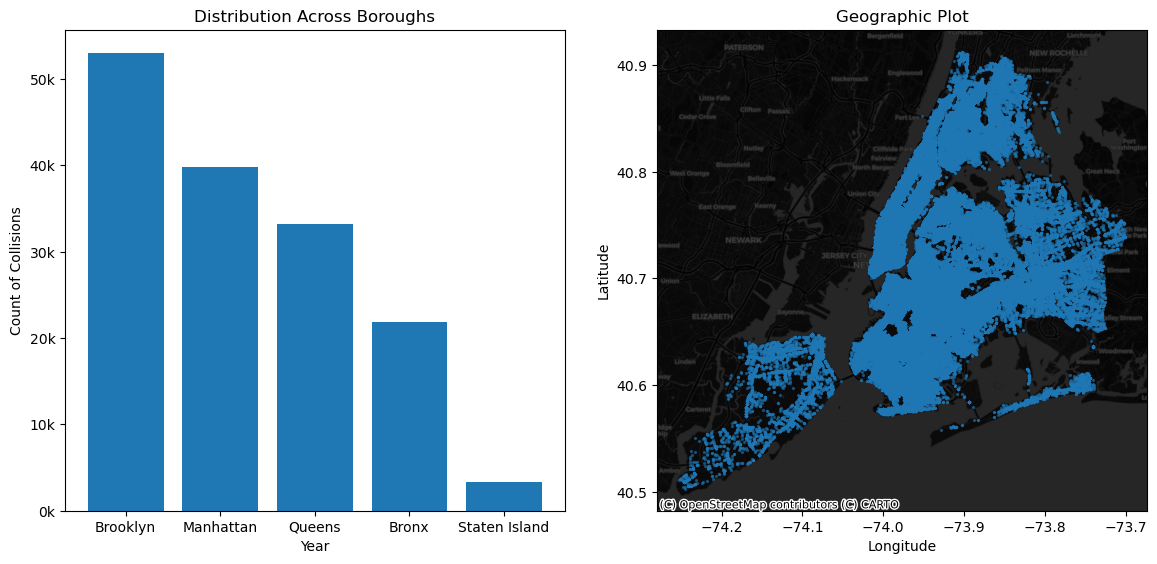

In [51]:
# Create figure and axes
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1]})

# Bar plot
ax0.bar(persons_only.BOROUGH.value_counts().index.str.title(), persons_only.BOROUGH.value_counts().values)

# Map plot
gdf.plot(ax=ax1, alpha=0.5, markersize=2)
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.DarkMatter, crs=gdf.crs.to_string())

ax0.set_title('Distribution Across Boroughs')
ax0.set_xlabel('Year')
ax0.set_ylabel('Count of Collisions')
# ax0.tick_params(axis='x', rotation=30)
ax0.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}k'))

ax1.set_title('Geographic Plot')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

plt.tight_layout(pad=2.0)
plt.show()

In [46]:
persons_only.BOROUGH.value_counts().index.str.title()

Index(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'], dtype='object', name='BOROUGH')

In [25]:
persons_only.BOROUGH.value_counts()

BOROUGH
BROOKLYN         53055
MANHATTAN        39782
QUEENS           33162
BRONX            21855
STATEN ISLAND     3283
Name: count, dtype: int64

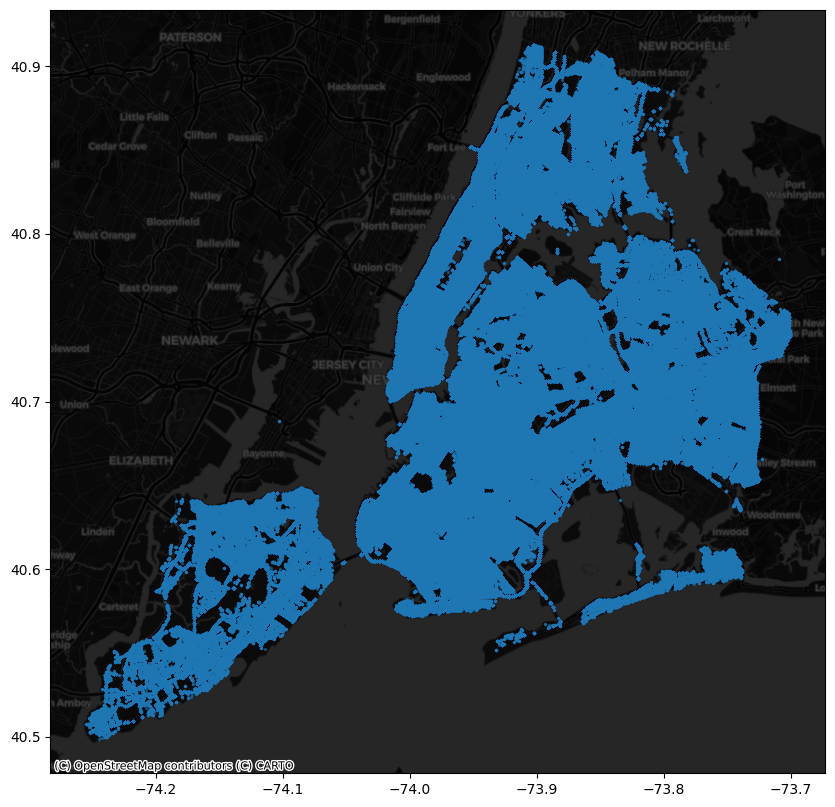

In [21]:
df = persons[
    (persons['LATITUDE'] >= 40.4774) & (persons['LATITUDE'] <= 40.9176) &
    (persons['LONGITUDE'] >= -74.2591) & (persons['LONGITUDE'] <= -73.7002)
]

gdf = gpd.GeoDataFrame(
    df, crs="EPSG:4326",
    geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE)
)

# Plot the points on a map
ax = gdf.plot(figsize=(10, 10), alpha=0.5, markersize=2)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter, crs=gdf.crs.to_string())

plt.show()

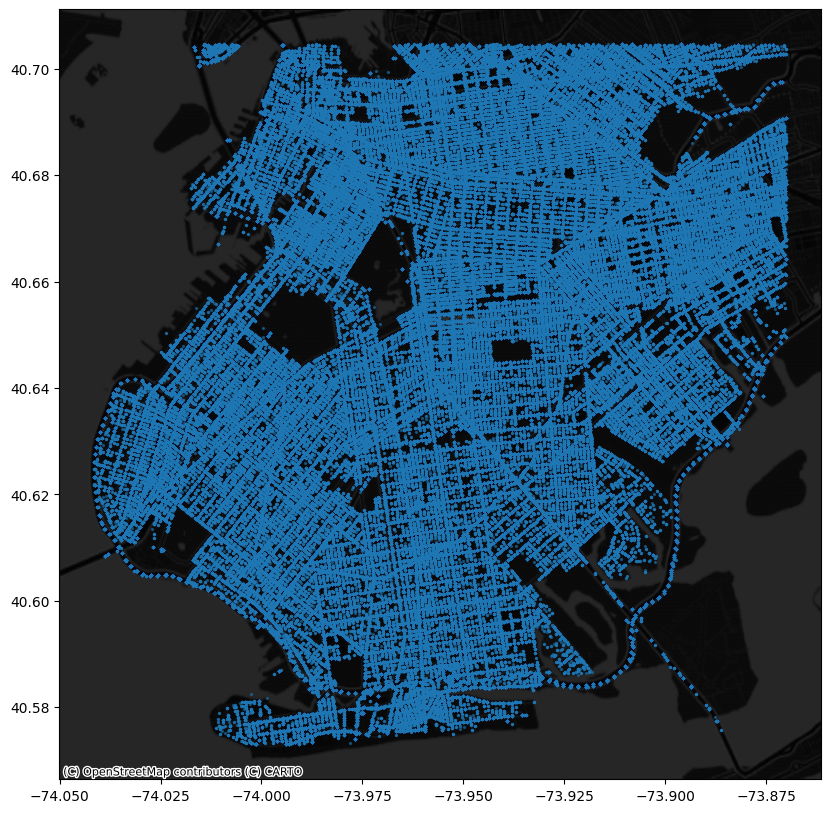

In [22]:
df = df[
    (df['LATITUDE'] >= 40.5730) & (df['LATITUDE'] <= 40.7046) &
    (df['LONGITUDE'] >= -74.0419) & (df['LONGITUDE'] <= -73.8700)
]

gdf = gpd.GeoDataFrame(
    df, crs="EPSG:4326",
    geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE)
)

# Plot the points on a map
ax = gdf.plot(figsize=(10, 10), alpha=0.5, markersize=2)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter, crs=gdf.crs.to_string())

plt.show()

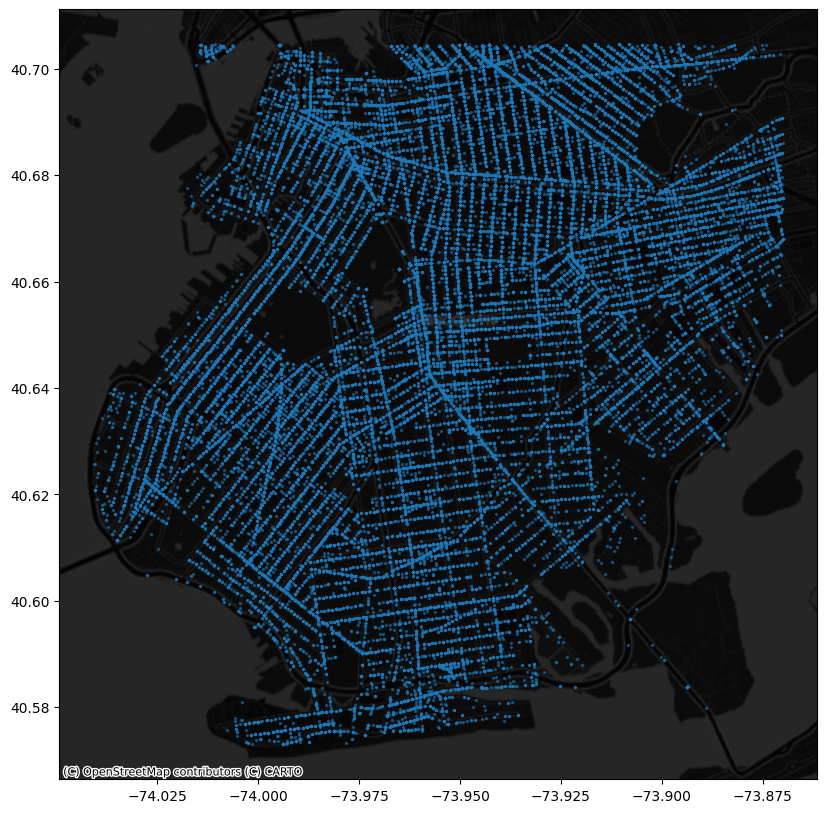

In [23]:
df = persons_only[
    (persons_only['LATITUDE'] >= 40.5730) & (persons_only['LATITUDE'] <= 40.7046) &
    (persons_only['LONGITUDE'] >= -74.0419) & (persons_only['LONGITUDE'] <= -73.8700)
]

gdf = gpd.GeoDataFrame(
    df, crs="EPSG:4326",
    geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE)
)

# Plot the points on a map
ax = gdf.plot(figsize=(10, 10), alpha=0.5, markersize=2)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter, crs=gdf.crs.to_string())

plt.show()

# Unique locations

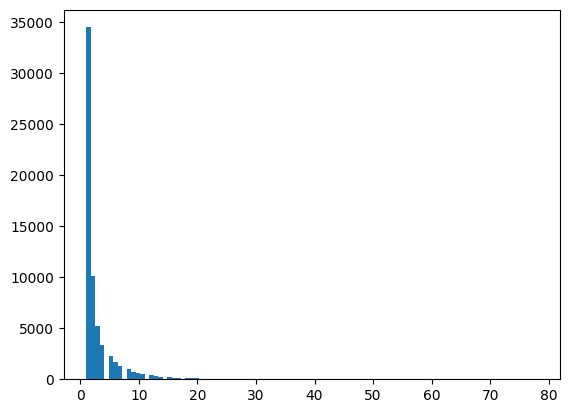

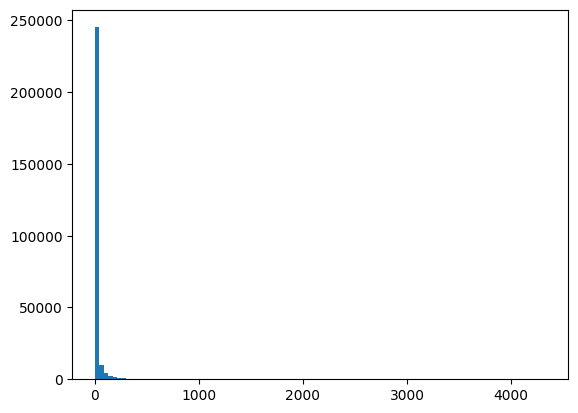

In [24]:
plt.figure()
plt.hist(persons_only[persons_only['LATITUDE'] != 0].LOCATION.value_counts(), bins=100)
plt.show()

plt.figure()
plt.hist(persons[persons['LATITUDE'] != 0].LOCATION.value_counts(), bins=100)
plt.show()

In [25]:
print(
    f'Unique locations persons only: {persons_only[persons_only["LATITUDE"] != 0]["LOCATION"].nunique()}'
    f'\nUnique locations all collisions: {persons[persons["LATITUDE"] != 0]["LOCATION"].nunique()}'
)

Unique locations persons only: 63615
Unique locations all collisions: 267373


# Export

In [ ]:
persons.to_csv('data/processed/collisions_all.csv', index=False)
persons_only.to_csv('data/processed/collisions_ped_cyc.csv', index=False)